In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipotle_df = pd.read_csv(url, sep="\t")
chipotle_df.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipotle_df.info()
chipotle_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [4]:
list(chipotle_df.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [5]:

# chipotle_df.sort_values("quantity")
item_orders = chipotle_df.groupby("item_name")['quantity'].sum()
max_order = item_orders.max()
most_order_item = item_orders.idxmax()
print(most_order_item)
print(max_order)

Chicken Bowl
761


In [6]:
chipotle_df['item_price']=chipotle_df['item_price'].astype(str).str.strip().str.replace('$','').astype(float)
revene = (chipotle_df['quantity']*chipotle_df['item_price']).sum()
revene
# chipotle_df['item_price']

39237.02

In [7]:
total_order = chipotle_df["order_id"].nunique()
total_order

1834

In [8]:
count = 0
for price in chipotle_df['item_price']:
    if price > 10:
        count += 1
count

1130

In [9]:
item_names = chipotle_df["item_name"].unique()
for item in item_names:
    print(item)


Chips and Fresh Tomato Salsa
Izze
Nantucket Nectar
Chips and Tomatillo-Green Chili Salsa
Chicken Bowl
Side of Chips
Steak Burrito
Steak Soft Tacos
Chips and Guacamole
Chicken Crispy Tacos
Chicken Soft Tacos
Chicken Burrito
Canned Soda
Barbacoa Burrito
Carnitas Burrito
Carnitas Bowl
Bottled Water
Chips and Tomatillo Green Chili Salsa
Barbacoa Bowl
Chips
Chicken Salad Bowl
Steak Bowl
Barbacoa Soft Tacos
Veggie Burrito
Veggie Bowl
Steak Crispy Tacos
Chips and Tomatillo Red Chili Salsa
Barbacoa Crispy Tacos
Veggie Salad Bowl
Chips and Roasted Chili-Corn Salsa
Chips and Roasted Chili Corn Salsa
Carnitas Soft Tacos
Chicken Salad
Canned Soft Drink
Steak Salad Bowl
6 Pack Soft Drink
Chips and Tomatillo-Red Chili Salsa
Bowl
Burrito
Crispy Tacos
Carnitas Crispy Tacos
Steak Salad
Chips and Mild Fresh Tomato Salsa
Veggie Soft Tacos
Carnitas Salad Bowl
Barbacoa Salad Bowl
Salad
Veggie Crispy Tacos
Veggie Salad
Carnitas Salad


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

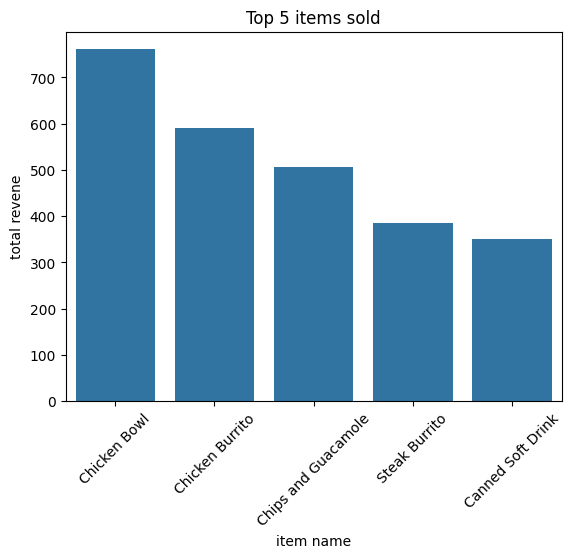

In [10]:
top5_sold = item_orders.sort_values(ascending=False).head()
seaborn.barplot(data=top5_sold)
plt.xlabel('item name')
plt.ylabel('total revene')
plt.title('Top 5 items sold')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 10 items ordered')

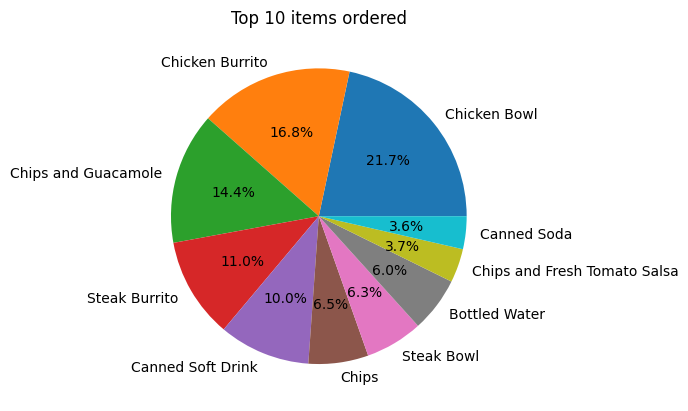

In [11]:
top10_sold = item_orders.sort_values(ascending=False).head(10)
plt.pie(top10_sold, labels=top10_sold.index, autopct="%1.1f%%")
plt.title('Top 10 items ordered')



item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Revene from top 10 orders')

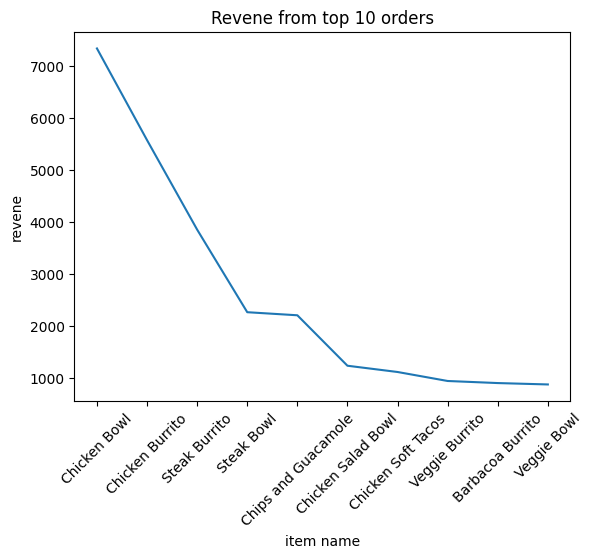

In [12]:
## 10.Create a line graph showing how much money was spent on the top 10 items ordered.
top_10_items = chipotle_df.groupby("item_name")['quantity'].sum().sort_values(ascending=False).head(10)
display(top_10_items)
top10_revene = chipotle_df.groupby("item_name")['item_price'].sum()
top10_price = top10_revene.sort_values(ascending = False).head(10)
seaborn.lineplot(data=top10_price)
plt.xlabel('item name')
plt.ylabel('revene')
plt.xticks(rotation=45)
plt.title('Revene from top 10 orders')